In [1]:
import  tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
 
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)
 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics= 'accuracy')
history = model.fit(x_train, y_train, epochs = 5)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.6273 - accuracy: 0.9068
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3397 - accuracy: 0.9370
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3030 - accuracy: 0.9397
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2764 - accuracy: 0.9461
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2715 - accuracy: 0.9488


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train[7]

3

In [6]:
x_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.9432
0.35004937648773193 0.9431999921798706


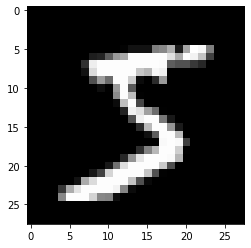

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = 'gray')
plt.show()
print(x_train[0])

In [9]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [10]:
y_pred[0]

7

In [11]:
model.save('model.h5')

In [12]:
m_new = tf.keras.models.load_model('model.h5')

In [13]:
predictions = m_new.predict([x_test])

In [14]:
print(predictions)

[[1.5617882e-30 8.5402998e-27 1.7766372e-15 ... 1.0000000e+00
  2.9797479e-23 3.6484549e-23]
 [9.9998726e-34 4.0068856e-18 1.0000000e+00 ... 6.4437240e-21
  6.5779216e-26 0.0000000e+00]
 [1.4875489e-29 1.0000000e+00 2.7301251e-14 ... 2.5706735e-08
  2.0969459e-16 5.4414489e-24]
 ...
 [3.0904192e-24 7.0106022e-12 1.4269827e-19 ... 3.9321286e-11
  1.8680681e-15 2.0979294e-09]
 [1.2334603e-23 4.7938101e-38 0.0000000e+00 ... 1.2359952e-14
  1.3396402e-10 3.5207174e-12]
 [2.6139532e-33 0.0000000e+00 1.6269350e-31 ... 4.2266642e-32
  2.9662242e-19 1.1203441e-23]]


In [15]:
import numpy as np
print(np.argmax(predictions[0]))

7


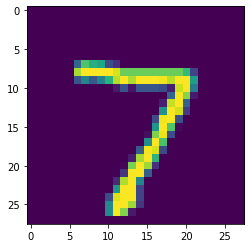

In [16]:
plt.imshow(x_test[0])
plt.show()

In [17]:
np.argmax(y_pred[0])

0

In [18]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
print(np.argmax(predictions[4]))

4


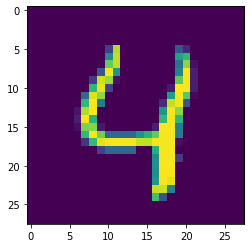

In [20]:
plt.imshow(x_test[4])
plt.show()

In [21]:
print(np.argmax(predictions[7]))

3


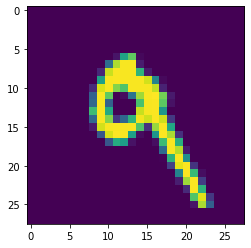

In [22]:
plt.imshow(x_test[7])
plt.show()

1


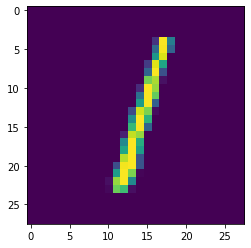

In [23]:
print(np.argmax(predictions[2]))
plt.imshow(x_test[2])
plt.show()

0


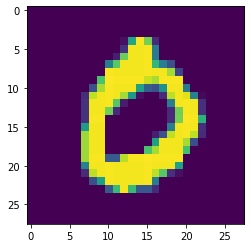

In [24]:
print(np.argmax(predictions[3]))
plt.imshow(x_test[3])
plt.show()

In [25]:
print(np.argmax(predictions))


7


2


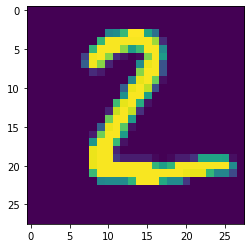

In [26]:
print(np.argmax(predictions[1]))
plt.imshow(x_test[1])
plt.show()

In [27]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
accuracy_score(y_pred,y_test)

0.9432

In [29]:
confusion_matrix(y_pred,y_test)

array([[ 958,    0,    4,    1,    3,    4,   13,    1,    4,    8],
       [   2, 1102,    4,    0,    4,    1,    3,    7,    2,    5],
       [   1,    5,  983,   14,    6,    0,    1,   39,    7,    1],
       [   1,    2,    3,  964,    0,   56,    0,   16,   15,   16],
       [   0,    3,    0,    0,  925,    0,    3,    1,   10,   24],
       [   1,    2,    0,    9,    0,  800,    8,    1,    8,   10],
       [   9,    1,    4,    0,    5,    8,  924,    0,    1,    0],
       [   1,    0,    6,    2,    5,    1,    0,  938,    1,    4],
       [   7,   20,   27,   17,   10,   18,    6,    9,  921,   24],
       [   0,    0,    1,    3,   24,    4,    0,   16,    5,  917]])

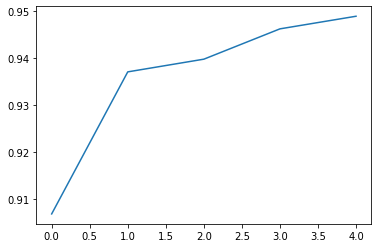

In [30]:
plt.plot(history.history['accuracy'])

In [31]:
model.get_weights()

[array([[-0.01759172, -0.0055614 ,  0.04124951, ..., -0.04874697,
         -0.05486752, -0.05584573],
        [ 0.0533021 ,  0.04842406, -0.02454967, ...,  0.05483259,
         -0.04559964,  0.01344328],
        [-0.06165507, -0.05929894,  0.0475714 , ..., -0.0548356 ,
         -0.05707894, -0.0504575 ],
        ...,
        [-0.02500241,  0.03081682, -0.00250337, ..., -0.00349987,
          0.00094638, -0.03639543],
        [ 0.03683822,  0.06763488,  0.00065689, ..., -0.04682746,
         -0.00565086,  0.05299934],
        [ 0.03613961, -0.04836401, -0.05940525, ..., -0.00845604,
          0.02379334, -0.05479562]], dtype=float32),
 array([-1.89913362e-02, -1.96989737e-02, -4.64847274e-02, -5.53176552e-02,
        -1.05110491e-02, -1.47747677e-02, -2.14304011e-02, -2.71859430e-02,
        -5.67956492e-02, -3.97214331e-02, -3.06349285e-02, -5.34790792e-02,
        -2.75690705e-02, -2.15839483e-02, -6.41272292e-02, -2.42643364e-05,
        -1.50473174e-02, -1.85542591e-02,  1.27469946e

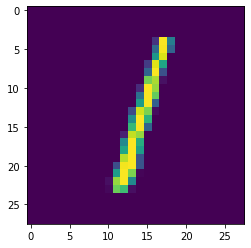

In [32]:
image_test = x_test[2]
plt.imshow(image_test)

In [33]:
import cv2
image_test_resize = cv2.resize(image_test,(28,28)).reshape(1,28,28)

In [34]:
m_new.predict_classes(image_test_resize)

array([1])